In [1]:
import sys
sys.path.append('../src/')

import cv2 as cv
import matplotlib.pyplot as plt

from musicdata2 import Glyph, BBox, Score

In [2]:
# Test file from the deepscores dataset
TEST_IMAGE_FN = '../data/deepscores/lg-7630010-aug-beethoven--page-35.png'
TEST_XML_FN = '../data/stav_output/lg-7630010-aug-beethoven--page-35.xml'

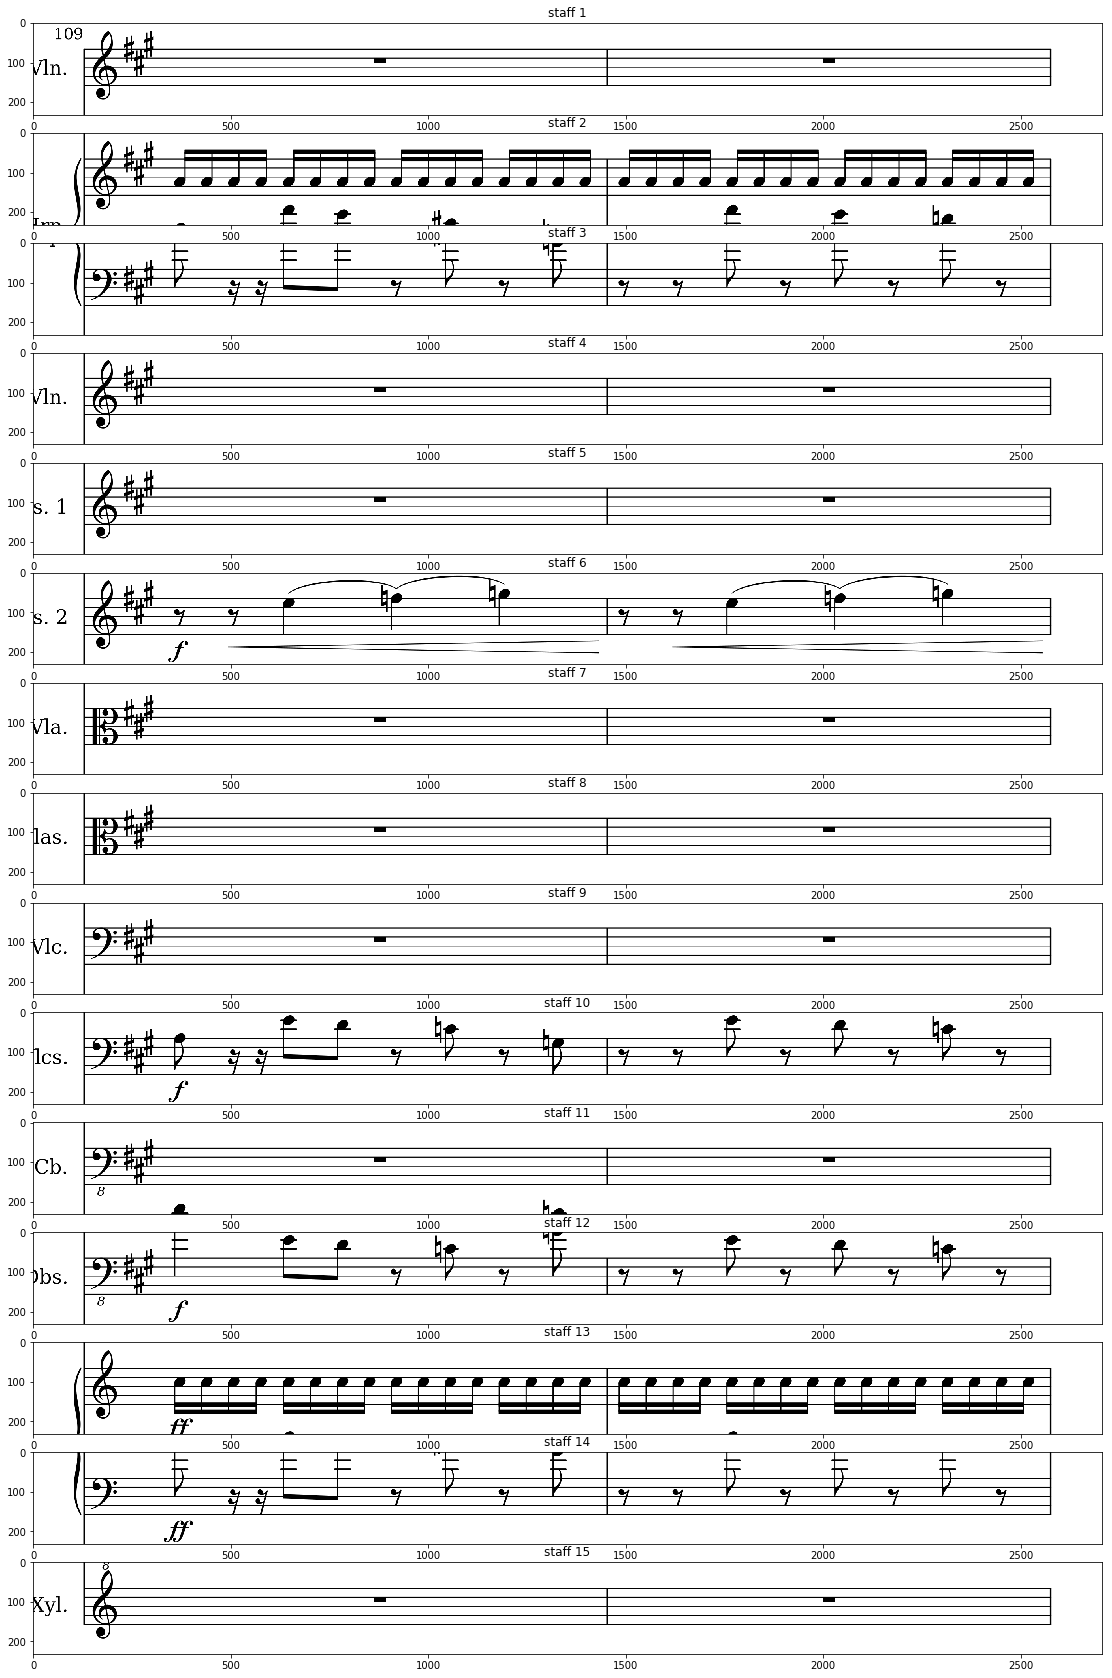

In [14]:
img = cv.imread(TEST_IMAGE_FN, 0)
score = Score(TEST_XML_FN)

fig, ax = plt.subplots(len(score), 1, figsize=(30,30))
for i, staff in enumerate(score):
    staff_image = score.extract_staff_image(img, staff)
    ax[i].imshow(staff_image, cmap='gray')
    ax[i].set_title('staff {}'.format(i + 1))